
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

https://gymnasium.farama.org/content/basic_usage/

https://gym.openai.com/

Frozen-Lake, simula una pista de patinaje sobre hielo. Esta pista está dividida en 16 celdas (4x4), y en algunas de ellas se ha roto el hielo (H). El patinador empieza a patinar en la posición superior izquierda y us objetivo es alcanzar la posición inferior derecha evitando caer en algún agujero. Si cae en agujero el episodio termina y la recompesa (reward) será cero. Si llega a la celda destino la recompensa será uno y termina el episodio. Al ser 4x4 hay 16 estados se numeran del 0 al 15. Hay un espacio de acciones compuesto de movimientos en cuatro direcciones (left, down, right, up). También hay valla entorno a la pista, si el agente intenta salir de la cuadrícula, rota y queda en la misma celda desde la que lo intentó. Existe un variable (slippery) que permite introducir incertidumbre en el problema. Si el patinador quiere ir hacia una dirección, hay 1/3 de probablidad de que lo logre (33%), 66% que vaya en otra dirección

In [1]:
!apt update
!apt install xvfb
!pip install pyvirtualdisplay



Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,496 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 http://security.ubuntu.com/ubuntu f

In [2]:
pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.4 MB/s eta 0:00:00


In [3]:
import pyvirtualdisplay

d = pyvirtualdisplay.Display()
d.start() # Start Xvfb and set "DISPLAY" environment properly.

Acciones:

0: LEFT

1: DOWN

2: RIGHT

3: UP

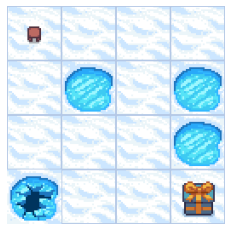

la accion ejecutada es  1
pulsa para seguir 
ultimo estado  12
ultimo refuerzo  0.0
pasos_ejecutados  11


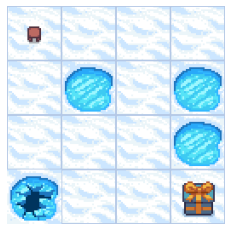

In [4]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt

d = Display()
d.start()

env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)
env.reset(seed=123, options={})

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())

a=input ("vamos a empezar... pulsa para seguir ")
#env.render()

is_done=False
t=0

while not is_done:
  accion=env.action_space.sample()
  #print ("la accion ejecutada es ",accion)
  estado,refuerzo,is_done,_=env.step(accion)
  t=t+1

  display.clear_output(wait=True)
  img.set_data(env.render('rgb_array'))
  plt.axis('off')
  display.display(plt.gcf())
  
  print ("la accion ejecutada es ",accion)
  a=input ("pulsa para seguir ")


print ("ultimo estado ",estado)
print ("ultimo refuerzo ",refuerzo)
print ("pasos_ejecutados ",t)



Este primer código muestra los pasos básicos con Gym y el entorno FrozenLake-v0. En primer lugar se carga el entorno. La funión  reset reinicia la partida, render muestra el estado del tablero, La función sample escoge una acción de forma aleatoria, step la ejecuta  y devuelve las consecuencias (estado siguiente, refuerzo recibido, así como si el estado al que ha pasado el sistema es final --agujero o goal alcanzados--).

En este código podemos ver como podemos acceder al modelo (información del sistema: probabilidades de transición, refuerzos). Debemos fijarnos como en este caso el entorno es estocástico (is_slippery=True

Acciones: 

0: LEFT

1: DOWN

2: RIGHT

3: UP

Refuerzo:

Reach goal(G): +1

Reach hole(H): 0

Reach frozen(F): 0

Estados:

0  --- 1 ---   2 ---  3

4  --- 5 ---   6 ---  7

8  --- 9 --   10--  11

12 - 13 -  14 - 15

En este código podemos ver como podemos acceder al modelo (información del sistema: probabilidades de transición, refuerzos), en este caso se muestra para el estado 10 y acción 1. Comprueba que entiendes bien la salida. También se importante fijarse que en este caso el entorno es estocástico (is_slippery=True)



In [5]:
env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
env.reset(seed=123, options={})

env.P
#En la variable nS recogemos el número de estados
nS=env.observation_space.n
state=10
action=1

print ("asumiendo que estamso en el estado ",state, " si ejecutamos la accion ",action)

for next_state in env.P[state][action]:
  print ("info del siguiente estado")
  print (next_state)
  probability = next_state[0]
  new_state = next_state[1]
  reward = next_state[2]
  print ("nuevo estado ",new_state," al que transita con probabilidad ",probability," y recibe el refuerzo ",reward)




asumiendo que estamso en el estado  10  si ejecutamos la accion  1
info del siguiente estado
(0.3333333333333333, 9, 0.0, False)
nuevo estado  9  al que transita con probabilidad  0.3333333333333333  y recibe el refuerzo  0.0
info del siguiente estado
(0.3333333333333333, 14, 0.0, False)
nuevo estado  14  al que transita con probabilidad  0.3333333333333333  y recibe el refuerzo  0.0
info del siguiente estado
(0.3333333333333333, 11, 0.0, True)
nuevo estado  11  al que transita con probabilidad  0.3333333333333333  y recibe el refuerzo  0.0


En este código podemos ver como podemos acceder al modelo (información del sistema: probabilidades de transición, refuerzos), en este caso se muestra para el estado 10 y acción 1. Comprueba que entiendes bien la salida. También se importante fijarse que en este caso el entorno es estocástico (is_slippery=True)

Acciones:

0: LEFT

1: DOWN

2: RIGHT

3: UP

Refuerzo:

Reach goal(G): +1

Reach hole(H): 0

Reach frozen(F): 0

Estados:

0 --- 1 --- 2 --- 3

4 --- 5 --- 6 --- 7

8 --- 9 -- 10-- 11

12 - 13 - 14 - 15

In [6]:
env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
env.reset(seed=123, options={})

env.P
#En la variable nS recogemos el número de estados
nS=env.observation_space.n
state=10
action=1

print ("asumiendo que estamso en el estado ",state, " si ejecutamos la accion ",action)

for next_state in env.P[state][action]:
  print ("info del siguiente estado")
  print (next_state)
  probability = next_state[0]
  new_state = next_state[1]
  reward = next_state[2]
  print ("nuevo estado ",new_state," al que transita con probabilidad ",probability," y recibe el refuerzo ",reward)

asumiendo que estamso en el estado  10  si ejecutamos la accion  1
info del siguiente estado
(0.3333333333333333, 9, 0.0, False)
nuevo estado  9  al que transita con probabilidad  0.3333333333333333  y recibe el refuerzo  0.0
info del siguiente estado
(0.3333333333333333, 14, 0.0, False)
nuevo estado  14  al que transita con probabilidad  0.3333333333333333  y recibe el refuerzo  0.0
info del siguiente estado
(0.3333333333333333, 11, 0.0, True)
nuevo estado  11  al que transita con probabilidad  0.3333333333333333  y recibe el refuerzo  0.0


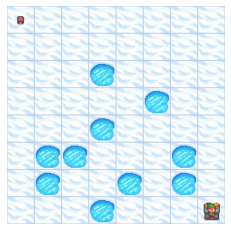

la accion ejecutada es  2
pulsa para seguir 
el agente ha finalizado en 14 diclos 
el refuerzo acumulado durante el episodio ha sido 1.000000


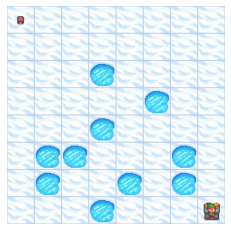

In [9]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt


import numpy as np
import random
import time

GAMMA = 0.9

class Agent:
  politica_cambiada=True

  def __init__(self):
    print ("Inicializamos la valoración de los estados", env.observation_space.n)
    #solo se podrían inicializar los estados no terminales con un valor distinto de cero..
    self.value_function = np.zeros(env.observation_space.n)
    #construimos una política determininsta, en cada estado se propone una única acción (las acciones son valores enterores entre 0 y 3)
    #la politica inicial sugiere ejecutar la acción cero para todos los estados
    self.policy = np.zeros(env.observation_space.n, dtype=int)
    


  def policy_evaluation(self):
    #P, nS, nA, policy, gamma=0.9, tol=1e-3

    umbral_theta=1e-3
    
    self.value_function = np.zeros(env.observation_space.n)
    copia_value_function =  np.zeros(env.observation_space.n, dtype=float)
    nS=env.observation_space.n
    
    while True:
        for state in range(nS):
            #asumimos política determinista, por lo que el primer sumatorio del algoritmo desaparece...
            for next_state in env.P[state][self.policy[state]]:
                probability = next_state[0]
                new_state = next_state[1]
                reward = next_state[2]
                #print(gamma*probability*value_function[new_state])
                copia_value_function[state] += probability*(reward + GAMMA*self.value_function[new_state])
            #print ("estado ",state," valoración original ",self.value_function[state],"nueva valoracion ",copia_value_function[state])
                
        diff = max(np.abs(copia_value_function - self.value_function))
        #print ("delta ",diff)
        #input ("pulsa para seguir ")
        if diff <= umbral_theta:
            self.value_function = copia_value_function.copy()
            break
        else:
            self.value_function = copia_value_function.copy()
            #reiniciamos para el sumatorio de la siguiente interaccion
            copia_value_function = np.zeros(nS) 
            #print(updated_value_function, '\n')
            #print(value_function)

  
  
  def policy_improvement(self):
     #P, nS, nA, value_from_policy, policy, gamma=0.9
     #definimos el numero de estados y el  numero de acciones...
     nS=env.observation_space.n
     nA=env.action_space.n
     #vamos a construir una nueva politica determinista
     self.politica_cambiada=False    
     ############################
     cambios=1
     while (cambios>0):
       cambios=0
       for state in range(nS):
        valoraciones = []
        candidatas=[]
        old_action=self.policy[state]
        for action in range(nA):
            value = 0
            for next_state in env.P[state][action]:
                probability = next_state[0]
                new_state = next_state[1]
                reward = next_state[2]
                value += probability*(reward + GAMMA*self.value_function[new_state])
            valoraciones.append(value)
            #print ("accion ",action,"valoracion ",value)
            
        #candidatas=actions.index(np.max(actions)) 
        #np.asarray -->convierte la tupla que devuelve np.where en un array (pero tiene forma de matriz)
        #flatten --> convierte la matriz en vector, uniendo por filas
        candidatas=np.asarray(np.where(max(valoraciones) == valoraciones)).flatten()
        #print ("valoraciones ",actions)
        #print ("acciones candidatas entre las que escogeremos al azar ",candidatas)       

        self.policy[state]=random.choice(candidatas)
        #self.policy[state] = np.argmax(actions)
        #print ("para el estado ",state,"sugerimos ahora la accion ",self.policy[state]) 
        if (np.abs(valoraciones[old_action]-valoraciones[self.policy[state]])>0.001):
          #print ("old action ",old_action,"valoracion ",valoraciones[old_action],"nueva accion ",self.policy[state],"valoracion nueva ",valoraciones[self.policy[state]])
          cambios=cambios+1
          self.politica_cambiada=True
        #print ("cambios hechos ",cambios)

def train(agent): 

    #best_reward = 0.0 
    #while best_reward < REWARD_THRESHOLD:
    while (agent.politica_cambiada):
      agent.policy_evaluation()
      print ("termine la valoración de la política, ahora la mejoramos....")
      agent.policy_improvement()
      print ("termine policy improvement vemos si procede un nuevo ciclo ",agent.politica_cambiada)
      #input ("pulsa para un nuevo ciclo...")


def ejecuta_episodio(agent,ciclos_maximos):
  ciclos_ejecutados=0
  episode_reward = 0
  estado = env.reset()
  for t in range(ciclos_maximos):
    #env.render()
    time.sleep(0.25)
    accion = agent.policy[estado]
    estado, refuerzo, acabado, _ = env.step(accion)
    episode_reward += refuerzo
    ciclos_ejecutados += 1

    display.clear_output(wait=True)
    img.set_data(env.render('rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())

    print ("la accion ejecutada es ",accion)
    a=input ("pulsa para seguir ") 

    if acabado:
      break
  
  #env.render()
  if not acabado:
    print("El agente no ha sido capaz de finalizar en  un máximo de {} ciclos.".format(ciclos_maximos))
  else:
    print("el agente ha finalizado en %d diclos " % ciclos_ejecutados)
    print("el refuerzo acumulado durante el episodio ha sido %f" % episode_reward)


#Modulo principal
d = Display()
d.start()


#"Deterministic-4x4-FrozenLake-v0"
#env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)
#NUMERO_MAXIMO_CICLOS=20

#"Deterministic-8x8-FrozenLake-v0"
env=gym.make("FrozenLake-v1", desc=None, map_name="8x8", is_slippery=False)
NUMERO_MAXIMO_CICLOS=20

#"Stochastic-4x4-FrozenLake-v0"
#env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
#NUMERO_MAXIMO_CICLOS=100


env.reset(seed=123, options={})



print ("espacio de estados ",env.observation_space)
print ("el numero de estados es", env.observation_space.n)
print ("mostramos el espacio de estados")
print (env.action_space)
a=input ("vamos a empezar... pulsa para seguir ")

#Discrete (16) indica que son 16 estados posibles, desde el 0 al 15
#Hay un estado inicial, el cero y 5 estados terminales
#Dispone de un espacio de estados discreto, formado por 4 acciones posibles
#izquierda, abajo,derecha y arriba

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())
#input ("pulsa para seguir ")
#env.P

agent = Agent()
train(agent)

input ("vamos a ejecutar un episodio, pulsa para seguir ")
ejecuta_episodio(agent,NUMERO_MAXIMO_CICLOS)



Fíjate que si el entorno es estocástico deberiámos repetir el experimento un determinado número de veces y mostrar el porcentaje de éxitos. Pero en ese caso no mostramos la salida gráfica por pantalla....

In [8]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt


import numpy as np
import random
import time

GAMMA = 0.9

class Agent:
  politica_cambiada=True

  def __init__(self):
    print ("Inicializamos la valoración de los estados", env.observation_space.n)
    #solo se podrían inicializar los estados no terminales con un valor distinto de cero..
    self.value_function = np.zeros(env.observation_space.n)
    #construimos una política determininsta, en cada estado se propone una única acción (las acciones son valores enterores entre 0 y 3)
    #la politica inicial sugiere ejecutar la acción cero para todos los estados
    self.policy = np.zeros(env.observation_space.n, dtype=int)
    


  def policy_evaluation(self): #policy-iteration
    #P, nS, nA, policy, gamma=0.9, tol=1e-3

    umbral_theta=1e-3
    
    self.value_function = np.zeros(env.observation_space.n)
    copia_value_function =  np.zeros(env.observation_space.n, dtype=float)
    nS=env.observation_space.n
    
    while True:
        for state in range(nS):
            #asumimos política determinista, por lo que el primer sumatorio del algoritmo desaparece...
            for next_state in env.P[state][self.policy[state]]:
                probability = next_state[0]
                new_state = next_state[1]
                reward = next_state[2]
                #print(gamma*probability*value_function[new_state])
                copia_value_function[state] += probability*(reward + GAMMA*self.value_function[new_state])
            #print ("estado ",state," valoración original ",self.value_function[state],"nueva valoracion ",copia_value_function[state])
                
        diff = max(np.abs(copia_value_function - self.value_function))
        #print ("delta ",diff)
        #input ("pulsa para seguir ")
        if diff <= umbral_theta:
            self.value_function = copia_value_function.copy()
            break
        else:
            self.value_function = copia_value_function.copy()
            #reiniciamos para el sumatorio de la siguiente interaccion
            copia_value_function = np.zeros(nS) 
            #print(updated_value_function, '\n')
            #print(value_function)

  
  
  def policy_improvement(self):
     #P, nS, nA, value_from_policy, policy, gamma=0.9
     #definimos el numero de estados y el  numero de acciones...
     nS=env.observation_space.n
     nA=env.action_space.n
     #vamos a construir una nueva politica determinista
     self.politica_cambiada=False    
     ############################
     cambios=1
     while (cambios>0):
       cambios=0
       for state in range(nS):
        valoraciones = []
        candidatas=[]
        old_action=self.policy[state]
        for action in range(nA):
            value = 0
            for next_state in env.P[state][action]:
                probability = next_state[0]
                new_state = next_state[1]
                reward = next_state[2]
                value += probability*(reward + GAMMA*self.value_function[new_state])
            valoraciones.append(value)
            #print ("accion ",action,"valoracion ",value)
            
        #candidatas=actions.index(np.max(actions)) 
        #np.asarray -->convierte la tupla que devuelve np.where en un array (pero tiene forma de matriz)
        #flatten --> convierte la matriz en vector, uniendo por filas
        candidatas=np.asarray(np.where(max(valoraciones) == valoraciones)).flatten()
        #print ("valoraciones ",actions)
        #print ("acciones candidatas entre las que escogeremos al azar ",candidatas)       

        self.policy[state]=random.choice(candidatas)
        #self.policy[state] = np.argmax(actions)
        #print ("para el estado ",state,"sugerimos ahora la accion ",self.policy[state]) 
        if (np.abs(valoraciones[old_action]-valoraciones[self.policy[state]])>0.001):
          #print ("old action ",old_action,"valoracion ",valoraciones[old_action],"nueva accion ",self.policy[state],"valoracion nueva ",valoraciones[self.policy[state]])
          cambios=cambios+1
          self.politica_cambiada=True
        #print ("cambios hechos ",cambios)

def train(agent): 

    #best_reward = 0.0 
    #while best_reward < REWARD_THRESHOLD:
    while (agent.politica_cambiada):
      agent.policy_evaluation()
      print ("termine la valoración de la política, ahora la mejoramos....")
      agent.policy_improvement()
      print ("termine policy improvement vemos si procede un nuevo ciclo ",agent.politica_cambiada)
      #input ("pulsa para un nuevo ciclo...")


def ejecuta_episodio(agent,ciclos_maximos):
  global aciertos
  global fallos
  ciclos_ejecutados=0
  episode_reward = 0
  estado = env.reset()
  for t in range(ciclos_maximos):
    accion = agent.policy[estado]
    estado, refuerzo, acabado, _ = env.step(accion)
    episode_reward += refuerzo
    ciclos_ejecutados += 1
    if acabado:
      break
  
  if not acabado:
    print("El agente no ha sido capaz de finalizar en  un máximo de {} ciclos.".format(ciclos_maximos))
  else:
    print("el agente ha finalizado en %d diclos " % ciclos_ejecutados)
    print("el refuerzo acumulado durante el episodio ha sido %f" % episode_reward)
    if episode_reward<1:
        fallos=fallos+1
    else:
        aciertos=aciertos+1

#Modulo principal
#"Stochastic-4x4-FrozenLake-v0"
env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
NUMERO_MAXIMO_CICLOS=100
env.reset(seed=123, options={})

print ("espacio de estados ",env.observation_space)
print ("el numero de estados es", env.observation_space.n)
print ("mostramos el espacio de estados")
print (env.action_space)
a=input ("vamos a empezar... pulsa para seguir ")


agent = Agent()
train(agent)

fallos=0
aciertos=0
numero_experimentos=50
for ciclo in range(numero_experimentos):
  #input ("vamos a ejecutar un episodio, pulsa para seguir ")
  print ("ejecutamos episodio ",ciclo)
  ejecuta_episodio(agent,NUMERO_MAXIMO_CICLOS)

porcentaje_aciertos=((float)(aciertos)/(float)(numero_experimentos))*100.0
print ("aciertos ",aciertos,"fallos ",fallos, "porcentaje ",porcentaje_aciertos )

espacio de estados  Discrete(16)
el numero de estados es 16
mostramos el espacio de estados
Discrete(4)
vamos a empezar... pulsa para seguir 
Inicializamos la valoración de los estados 16
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  True
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  True
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  True
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  False
ejecutamos episodio  0
el agente ha finalizado en 26 diclos 
el refuerzo acumulado durante el episodio ha sido 1.000000
ejecutamos episodio  1
el agente ha finalizado en 11 diclos 
el refuerzo acumulado durante el episodio ha sido 0.000000
ejecutamos episodio  2
el agente ha finalizado en 62 diclos 
el ref

In [ ]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt


import numpy as np
import random
import time

GAMMA = 0.9

class Agent:
  politica_cambiada=True

  def __init__(self):
    print ("Inicializamos la valoración de los estados", env.observation_space.n)
    #solo se podrían inicializar los estados no terminales con un valor distinto de cero..
    self.value_function = np.zeros(env.observation_space.n)
    #construimos una política determininsta, en cada estado se propone una única acción (las acciones son valores enterores entre 0 y 3)
    #la politica inicial sugiere ejecutar la acción cero para todos los estados
    self.policy = np.zeros(env.observation_space.n, dtype=int)
    


  def policy_evaluation(self): #value-iteration
    #P, nS, nA, policy, gamma=0.9, tol=1e-3

    umbral_theta=1e-3
    
    self.value_function = np.zeros(env.observation_space.n)
    copia_value_function =  np.zeros(env.observation_space.n, dtype=float)
    nS=env.observation_space.n
    
    while True:
        for state in range(nS):
            #asumimos política determinista, por lo que el primer sumatorio del algoritmo desaparece...
            for next_state in env.P[state][self.policy[state]]:
                probability = next_state[0]
                new_state = next_state[1]
                if new_state == 5 or new_state == 7 or new_state == 11 or new_state == 12:
                  reward = -1
                else: 
                  reward = next_state[2]
                #print(gamma*probability*value_function[new_state])
                copia_value_function[state] += probability*(reward + GAMMA*self.value_function[new_state])
            #print ("estado ",state," valoración original ",self.value_function[state],"nueva valoracion ",copia_value_function[state])
                
        diff = max(np.abs(copia_value_function - self.value_function))
        #print ("delta ",diff)
        #input ("pulsa para seguir ")
        if diff <= umbral_theta:
            self.value_function = copia_value_function.copy()
            break
        else:
            self.value_function = copia_value_function.copy()
            #reiniciamos para el sumatorio de la siguiente interaccion
            copia_value_function = np.zeros(nS) 
            #print(updated_value_function, '\n')
            #print(value_function)

  
  
  def policy_improvement(self):
     #P, nS, nA, value_from_policy, policy, gamma=0.9
     #definimos el numero de estados y el  numero de acciones...
     nS=env.observation_space.n
     nA=env.action_space.n
     #vamos a construir una nueva politica determinista
     self.politica_cambiada=False    
     ############################
     cambios=1
     while (cambios>0):
       cambios=0
       for state in range(nS):
        valoraciones = []
        candidatas=[]
        old_action=self.policy[state]
        for action in range(nA):
            value = 0
            for next_state in env.P[state][action]:
                probability = next_state[0]
                new_state = next_state[1]
                reward = next_state[2]
                value += probability*(reward + GAMMA*self.value_function[new_state])
            valoraciones.append(value)
            #print ("accion ",action,"valoracion ",value)
            
        #candidatas=actions.index(np.max(actions)) 
        #np.asarray -->convierte la tupla que devuelve np.where en un array (pero tiene forma de matriz)
        #flatten --> convierte la matriz en vector, uniendo por filas
        candidatas=np.asarray(np.where(max(valoraciones) == valoraciones)).flatten()
        #print ("valoraciones ",actions)
        #print ("acciones candidatas entre las que escogeremos al azar ",candidatas)       

        self.policy[state]=random.choice(candidatas)
        #self.policy[state] = np.argmax(actions)
        #print ("para el estado ",state,"sugerimos ahora la accion ",self.policy[state]) 
        if (np.abs(valoraciones[old_action]-valoraciones[self.policy[state]])>0.001):
          #print ("old action ",old_action,"valoracion ",valoraciones[old_action],"nueva accion ",self.policy[state],"valoracion nueva ",valoraciones[self.policy[state]])
          cambios=cambios+1
          self.politica_cambiada=True
        #print ("cambios hechos ",cambios)

def train(agent): 

    #best_reward = 0.0 
    #while best_reward < REWARD_THRESHOLD:
    while (agent.politica_cambiada):
      agent.policy_evaluation()
      print ("termine la valoración de la política, ahora la mejoramos....")
      agent.policy_improvement()
      print ("termine policy improvement vemos si procede un nuevo ciclo ",agent.politica_cambiada)
      #input ("pulsa para un nuevo ciclo...")


def ejecuta_episodio(agent,ciclos_maximos):
  global aciertos
  global fallos
  ciclos_ejecutados=0
  episode_reward = 0
  estado = env.reset()
  for t in range(ciclos_maximos):
    accion = agent.policy[estado]
    estado, refuerzo, acabado, _ = env.step(accion)
    episode_reward += refuerzo
    ciclos_ejecutados += 1
    if acabado:
      break
  
  if not acabado:
    print("El agente no ha sido capaz de finalizar en  un máximo de {} ciclos.".format(ciclos_maximos))
  else:
    print("el agente ha finalizado en %d diclos " % ciclos_ejecutados)
    print("el refuerzo acumulado durante el episodio ha sido %f" % episode_reward)
    if episode_reward<1:
        fallos=fallos+1
    else:
        aciertos=aciertos+1

#Modulo principal
#"Stochastic-4x4-FrozenLake-v0"
env=gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)
NUMERO_MAXIMO_CICLOS=100
env.reset(seed=123, options={})

print ("espacio de estados ",env.observation_space)
print ("el numero de estados es", env.observation_space.n)
print ("mostramos el espacio de estados")
print (env.action_space)
a=input ("vamos a empezar... pulsa para seguir ")


agent = Agent()
train(agent)

fallos=0
aciertos=0
numero_experimentos=50
for ciclo in range(numero_experimentos):
  #input ("vamos a ejecutar un episodio, pulsa para seguir ")
  print ("ejecutamos episodio ",ciclo)
  ejecuta_episodio(agent,NUMERO_MAXIMO_CICLOS)

porcentaje_aciertos=((float)(aciertos)/(float)(numero_experimentos))*100.0
print ("aciertos ",aciertos,"fallos ",fallos, "porcentaje ",porcentaje_aciertos )

espacio de estados  Discrete(16)
el numero de estados es 16
mostramos el espacio de estados
Discrete(4)
vamos a empezar... pulsa para seguir 
Inicializamos la valoración de los estados 16
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  True
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  True
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  True
termine la valoración de la política, ahora la mejoramos....
termine policy improvement vemos si procede un nuevo ciclo  False
ejecutamos episodio  0
el agente ha finalizado en 26 diclos 
el refuerzo acumulado durante el episodio ha sido 1.000000
ejecutamos episodio  1
el agente ha finalizado en 11 diclos 
el refuerzo acumulado durante el episodio ha sido 0.000000
ejecutamos episodio  2
el agente ha finalizado en 62 diclos 
el ref

Modifica ahora el algoritmo anterior para implementar value-iteration:

Ahora ponemos refuerzo -1 en los agujeros y reimplementamos policy-iteration/value-iteration, comprueba que diferencia hay en el resultado.

Imagina ahora que quieres implementar los algoritmos anteriores para resolver el comportamiento de navegar a una posición objetivo con un robot. Indica desde el punto de vista teórico como abordarías el problema. Piensa, por  ejemplo como lo harías con el TurtleSim (simulador básico). Opcional, plantear también cual podría ser la solución para un comportamiento como el de seguir paredes.
